In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [6]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


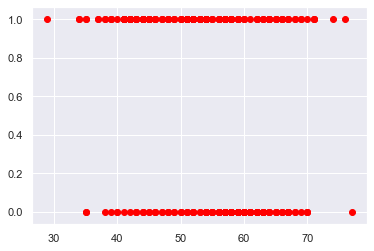

In [8]:
plt.scatter(data.age , data.target,color='red')

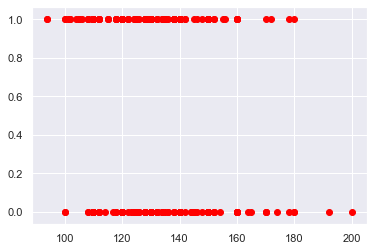

In [14]:
plt.scatter(data.trestbps , data.target , color='red')

In [17]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

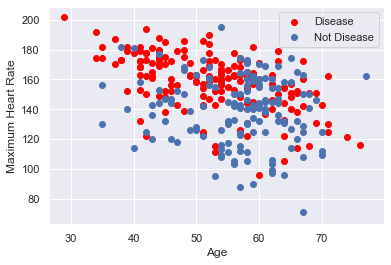

In [31]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [34]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")
frames = [data, a, b, c]
dataframe = pd.concat(frames, axis = 1)
dataframe = dataframe.drop(columns = ['cp', 'thal', 'slope'])

In [37]:
y = dataframe.target.values
x_data = dataframe.drop(['target'], axis = 1)
x_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,0,0,0,0,0,0,1,0,1,0


In [41]:
x_train ,x_test , y_train , y_test = train_test_split(x_data,y,test_size = 0.2)
x_train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
21,44,1,130,233,0,1,179,1,0.4,0,...,0,1,0,0,0,1,0,0,0,1
260,66,0,178,228,1,1,165,1,1.0,2,...,0,0,0,0,0,0,1,0,1,0
68,44,1,120,220,0,1,170,0,0.0,0,...,1,0,0,0,0,1,0,0,0,1
39,65,0,160,360,0,0,151,0,0.8,0,...,0,1,0,0,0,1,0,0,0,1
104,50,1,129,196,0,1,163,0,0.0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,51,1,125,213,0,0,125,1,1.4,1,...,0,0,1,0,0,1,0,0,0,1
272,67,1,120,237,0,1,71,0,1.0,0,...,0,0,0,0,0,1,0,0,1,0
61,54,1,108,309,0,1,156,0,0.0,0,...,1,0,0,0,0,0,1,0,0,1
115,37,0,120,215,0,1,170,0,0.0,0,...,0,1,0,0,0,1,0,0,0,1


In [43]:
model = LogisticRegression()
model.fit(x_train , y_train)

C:\Users\88017\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model.score(x_train , y_train)

0.8553719008264463

In [61]:
score = model.score(x_test , y_test)

In [51]:
predictions = model.predict(x_test)
predictions

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [53]:
from sklearn import metrics

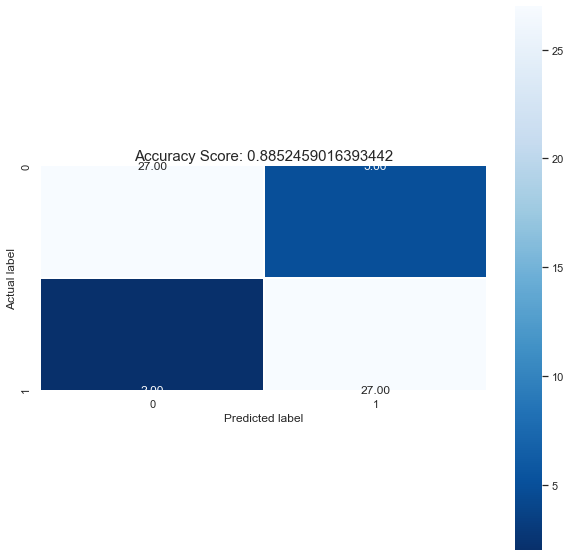

In [82]:
confusion_matrix = metrics.confusion_matrix(y_test , predictions)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
